In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-data-1/MultLabelTrainData.txt
/kaggle/input/test-data-1/TrainData5.txt
/kaggle/input/test-data-1/TrainData4.txt
/kaggle/input/test-data-1/TrainLabel3.txt
/kaggle/input/test-data-1/TestData4.txt
/kaggle/input/test-data-1/TrainLabel4.txt
/kaggle/input/test-data-1/MissingData2.txt
/kaggle/input/test-data-1/TestData6.txt
/kaggle/input/test-data-1/TrainData3.txt
/kaggle/input/test-data-1/MissingData1.txt
/kaggle/input/test-data-1/TrainData6.txt
/kaggle/input/test-data-1/TrainData1.txt
/kaggle/input/test-data-1/TestData5.txt
/kaggle/input/test-data-1/TestData3.txt
/kaggle/input/test-data-1/TestData1.txt
/kaggle/input/test-data-1/TrainLabel6.txt
/kaggle/input/test-data-1/MissingData3.txt
/kaggle/input/test-data-1/MultLabelTestData.txt
/kaggle/input/test-data-1/TestData2.txt
/kaggle/input/test-data-1/TrainLabel5.txt
/kaggle/input/test-data-1/TrainData2.txt
/kaggle/input/test-data-1/TrainLabel1.txt
/kaggle/input/test-data-1/MultLabelTrainLabel.txt
/kaggle/input/test-data-1/Tr

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler
# df = pd.read_fwf('/kaggle/input/test-data-1/TrainData1.txt')
data =  pd.read_csv('/kaggle/input/test-data-1/TrainData1.txt', delimiter = "\t", header=None)
label_data = pd.read_csv('/kaggle/input/test-data-1/TrainLabel1.txt', header=None)
test_data = pd.read_csv('/kaggle/input/test-data-1/TrainLabel1.txt', header=None)
training_data = np.array(data)
label_data.value_counts()

1    108
2     14
4     14
3     11
5      3
dtype: int64

In [3]:
# Filling missing value by the mean
import numpy.ma as ma
training_data = np.where(np.isnan(training_data), ma.array(training_data, mask=np.isnan(training_data)).mean(axis=0), training_data)

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

training_data = np.array(data)
label_data = np.array(label_data)

# dataset 1
X, label_data = shuffle(training_data,label_data, random_state=1)
X = training_data[0:120]
X_test = training_data[120:]
train_label = label_data[0:120]

In [5]:
#Balancing Data after divding training and test
from collections import Counter

# ros = RandomOverSampler(random_state=0, sampling_strategy = {1: 85, 2: 30, 3: 25, 4: 30, 5: 17})
# ros = RandomOverSampler(random_state=0)
# x, train_label = ros.fit_resample(X, train_label)


In [6]:
# One hot encoding
one_hot_Y = np.zeros((train_label.size, train_label.max()+1))
m, n = one_hot_Y.shape
for i in range (train_label.size):
    one_hot_Y[i, train_label[i]] = 1
one_hot_Y = np.delete(one_hot_Y, 0, 1)
one_hot_Y.shape
y_test = label_data[120:]

In [7]:
 np.random.seed(1)

In [8]:
def init_params(features, hidden_nodes, classes):
    W1 = np.random.randn(features, hidden_nodes)
    b1 = np.random.randn(hidden_nodes)
    W2 = np.random.randn(hidden_nodes, classes)
    b2 = np.random.randn(classes)
    return W1, b1, W2, b2

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(Z):
    expZ = np.exp(Z)
    return expZ / expZ.sum(axis=1, keepdims=True)

def forward_prop(X, W1, b1, W2, b2):
#     Z1 = X.dot(W1) + b1
    Z1 = np.dot(X, W1) + b1
    A = sigmoid(Z1)
#     Z2 = A.dot(W2) + b2
    Z2 = np.dot(A, W2) + b2
    Y = softmax(Z2)
    return Z1, A, Z2, Y

def back_prop(X, W1, b1, A, W2, b2, Y, one_hot_Y, alpha):
    delta_2 = Y - one_hot_Y
    delta_1 = (delta_2).dot(W2.T) * A * (1 - A)
    
    W2 -= alpha * A.T.dot(delta_2)
    b2 -= alpha * (delta_2).sum(axis=0)
    
    W1 -= alpha * X.T.dot(delta_1)
    b1 -= alpha * (delta_1).sum(axis=0)
    return W1, b1, W2, b2

def get_predictions(Y):
    out = []
    for i in range(len(Y)):
        out.append(1 + np.argmax(Y[i]))
    return out

def get_accuracy(predictions, train_label):
    return np.mean(predictions == train_label)

In [9]:
def gradien_descent():
    classes = 5
    hidden_nodes =19
    features = 3312
    alpha = 0.0007
    costs = []
    test_acc = []
    test_acc.append(0)
    train_acc = []
    ep = []
#     if ~W1.any():
    W1, b1, W2, b2 = init_params(features, hidden_nodes, classes)
    counter = 0
    early_stop = 0
    while(counter < 500):
        print("Counter", counter)
        Z1, A, Z2, Y = forward_prop(X, W1, b1, W2, b2)
        W1, b1, W2, b2 = back_prop(X, W1, b1, A, W2, b2, Y, one_hot_Y, alpha)
        Z11, A1, Z21, Y_TEST = forward_prop(X_test, W1, b1, W2, b2)
        predictions = get_predictions(Y)
        pred_test = get_predictions(Y_TEST)
        acc_test = get_accuracy(pred_test, y_test)
        acc_train = get_accuracy(predictions, train_label)
        print('train accuracy is ',acc_train)
        print('test accuracy is ',acc_test)
        print(Counter(pred_test))
        loss = np.sum(-one_hot_Y * np.log(Y))
        print('Loss function value: ', loss)
        ep.append(counter)
        costs.append(loss)
        test_acc.append(acc_test)
        train_acc.append(acc_train)
        if acc_test <= test_acc[counter-1]:
            early_stop = early_stop + 1
        print('early_stop is ', early_stop)
        counter = counter + 1
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Hyper-parameters optimization')
    ax1.plot(ep, test_acc[1:], color='red', lw=5)
    ax1.plot(ep, train_acc, color='orange', lw=7)
    ax2.plot(ep, costs)
    plt.show()
    return W1, b1, W2, b2, Y

Counter 0
train accuracy is  0.3707638888888889
test accuracy is  0.3877777777777778
Counter({1: 14, 3: 7, 4: 5, 2: 4})
Loss function value:  283.1267789253651
early_stop is  1
Counter 1
train accuracy is  0.3915972222222222
test accuracy is  0.4122222222222222
Counter({1: 15, 3: 6, 4: 5, 2: 4})
Loss function value:  271.68942187445157
early_stop is  1
Counter 2
train accuracy is  0.3968055555555556
test accuracy is  0.4122222222222222
Counter({1: 15, 3: 6, 4: 5, 2: 4})
Loss function value:  262.3462111256467
early_stop is  1
Counter 3
train accuracy is  0.4228472222222222
test accuracy is  0.4122222222222222
Counter({1: 15, 3: 6, 4: 5, 2: 4})
Loss function value:  254.663538034029
early_stop is  2
Counter 4
train accuracy is  0.4332638888888889
test accuracy is  0.4122222222222222
Counter({1: 15, 3: 6, 4: 5, 2: 4})
Loss function value:  248.29731022038894
early_stop is  3
Counter 5
train accuracy is  0.44395833333333334
test accuracy is  0.4122222222222222
Counter({1: 15, 3: 6, 4: 5, 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


train accuracy is  0.5223611111111112
test accuracy is  0.5311111111111111
Counter({1: 20, 2: 4, 4: 4, 3: 2})
Loss function value:  217.29751679600406
early_stop is  7
Counter 16
train accuracy is  0.5223611111111112
test accuracy is  0.5311111111111111
Counter({1: 20, 2: 4, 4: 4, 3: 2})
Loss function value:  215.99737329687045
early_stop is  8
Counter 17
train accuracy is  0.5223611111111112
test accuracy is  0.5311111111111111
Counter({1: 20, 2: 4, 4: 4, 3: 2})
Loss function value:  214.79787977781112
early_stop is  9
Counter 18
train accuracy is  0.5275694444444444
test accuracy is  0.5311111111111111
Counter({1: 20, 2: 4, 4: 4, 3: 2})
Loss function value:  213.68385020781636
early_stop is  10
Counter 19
train accuracy is  0.5327777777777778
test accuracy is  0.5311111111111111
Counter({1: 20, 2: 4, 4: 4, 3: 2})
Loss function value:  212.6426773093672
early_stop is  11
Counter 20
train accuracy is  0.5327777777777778
test accuracy is  0.5311111111111111
Counter({1: 20, 2: 4, 4: 4, 3

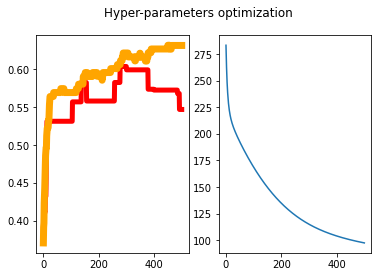

In [10]:
W1, b1, W2, b2, Y = gradien_descent()